<a href="https://colab.research.google.com/github/kennyluu130/Banana-Quality-Prediction-With-Machine-Learning/blob/main/BananaQualityPredictionWithMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Banana Quality Prediction with Machine Learning

- Kenny Luu
- UCLA 2027
- Computer Science and Linguistics
- Data Science Engineering

###Imports

In [ ]:
#Data manipulation and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit preprocessing, hyperparameter, classification report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Scikit models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Get Kaggle Dataset
import requests
import io
import csv

###Dataset

In [ ]:
# Load dataset from Google Drive
file_url = "https://drive.google.com/file/d/1NMFqwoLpZstu1n-bG2JGmFflha4v8PXY/view?usp=drive_link"
file_id = file_url.split("/")[-2]

#URL
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# Send a GET request for binary content
response = requests.get(url)
content = response.content

# Load csv to pandas dataframe
df = pd.read_csv(io.StringIO(content.decode('utf-8')))

###Initial Data Explorations

In [ ]:
print("First 5 rows:\n", df.head())
print("\nSummary:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nShape:\n", df.shape)

First 5 rows:
        Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  

Summary:
               Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.277651    -2.223574    -2.107329    -1.590458

###Preprocessing / Cleaning / Scaling

In [ ]:
#Drop null values, drop duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
#Encode Bad => 0, Good => 1
df["Quality"] = df["Quality"].map({"Bad": 0, "Good": 1})


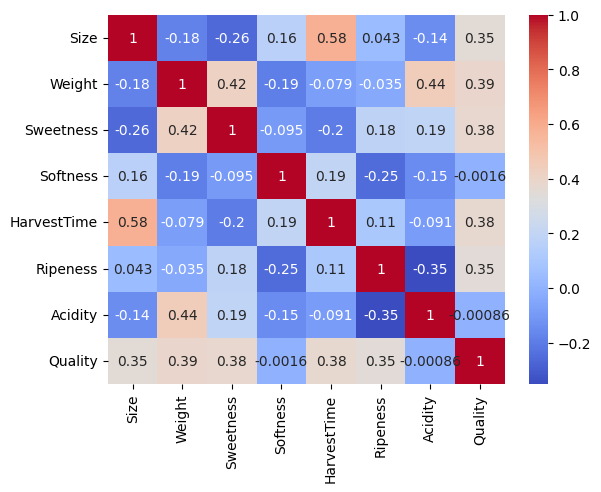

In [ ]:
#check correlation between any features
#can consider dropping a feature if highly correlated with another
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Split into feature and target matrices
X = df.drop('Quality', axis=1)
y = df['Quality']

In [ ]:
#80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Visualizations

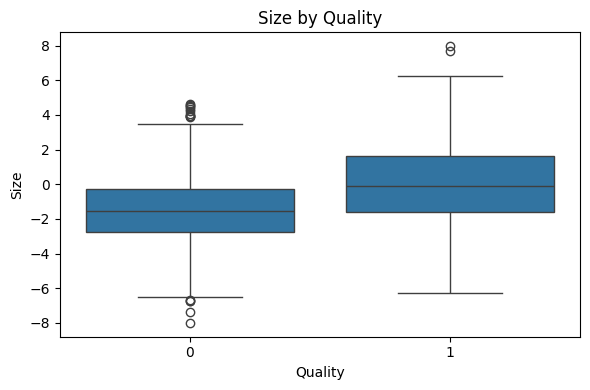

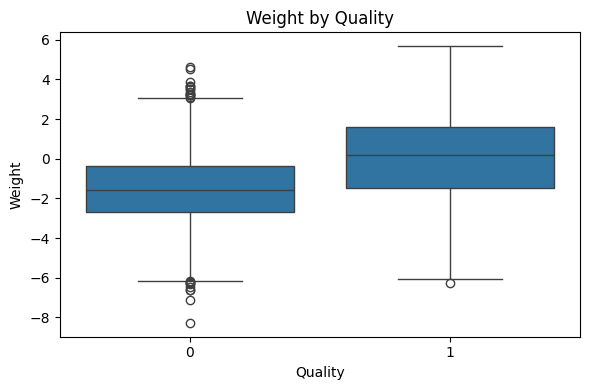

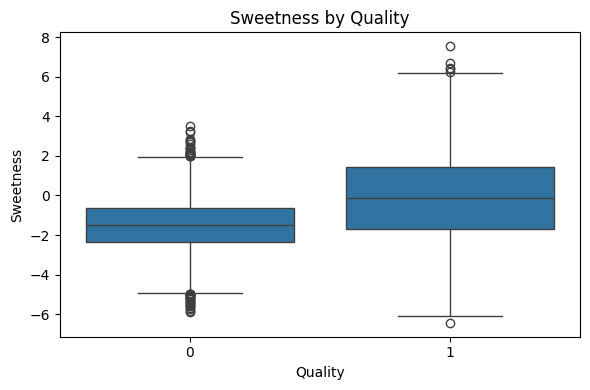

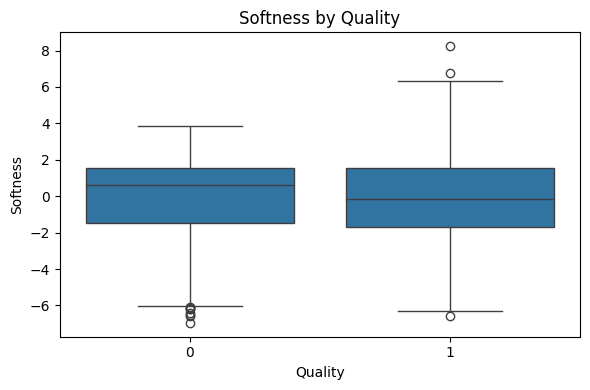

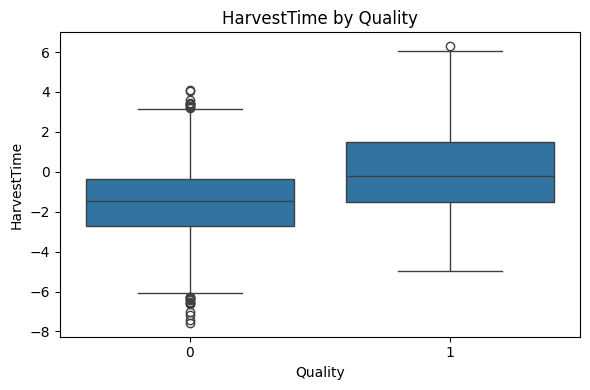

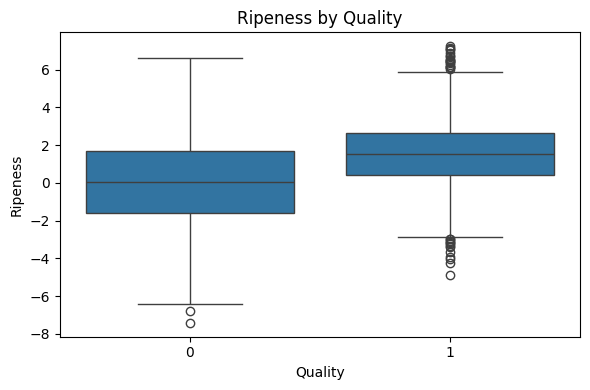

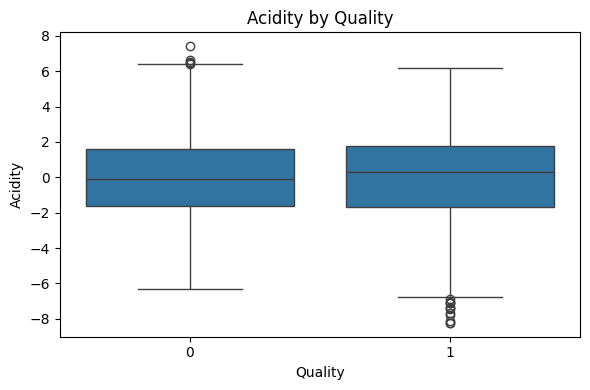

In [ ]:
#Features Box Plot
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Quality', y=feature, data=df)
    plt.title(f'{feature} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

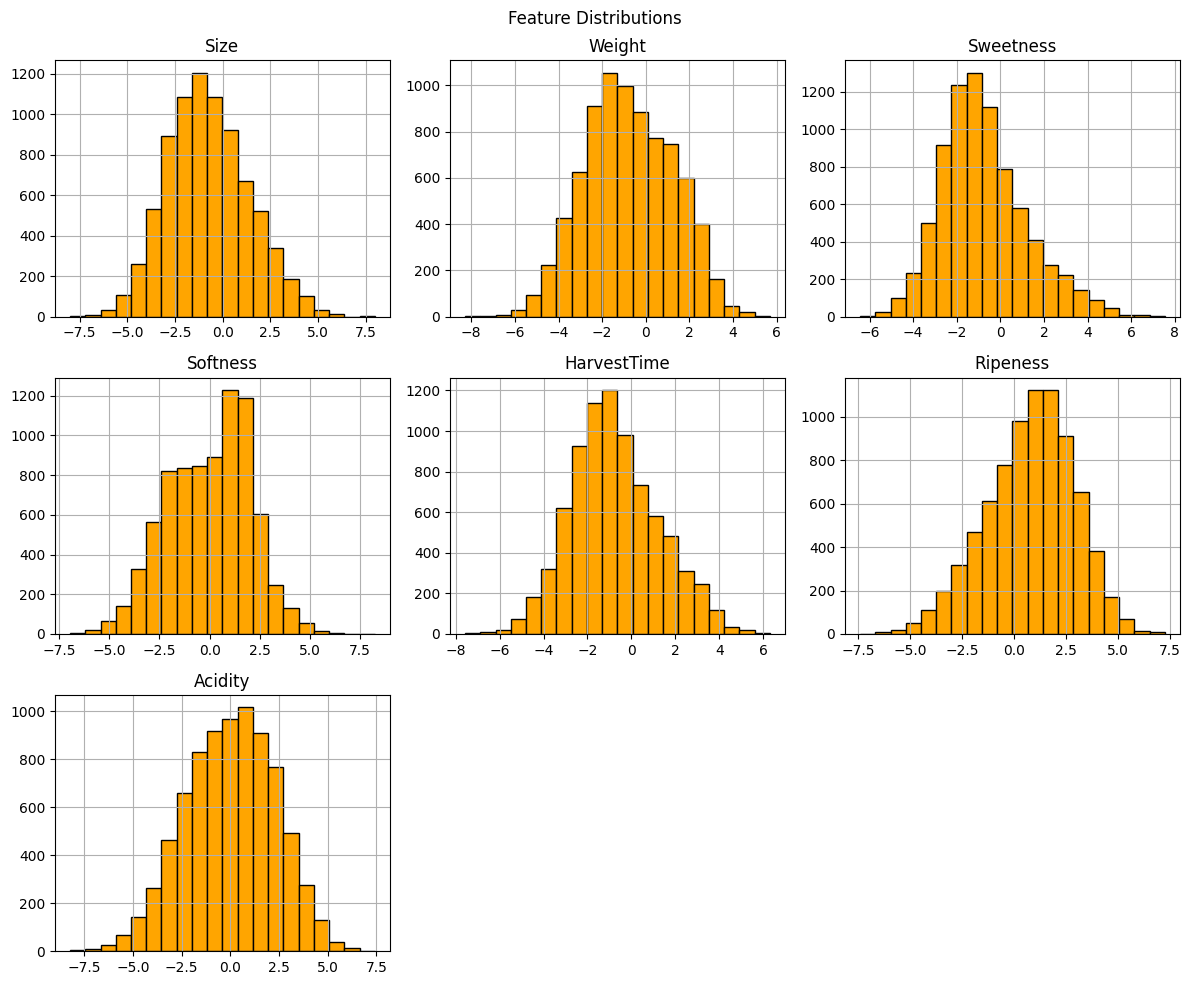

In [ ]:
# Feature Histograms
df_features = df.drop('Quality', axis=1)

df_features.hist(bins=20, figsize=(12, 10), color='orange', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

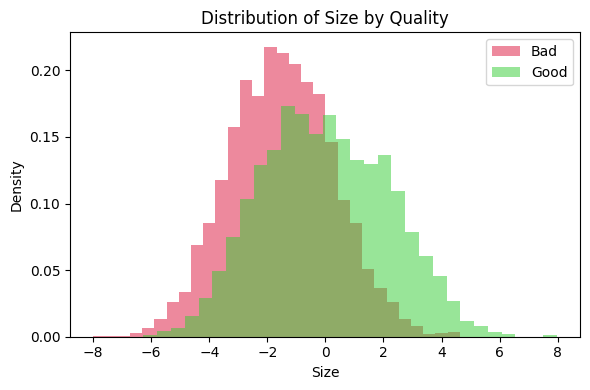

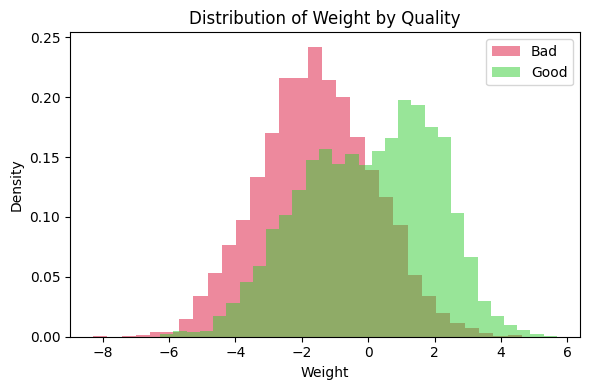

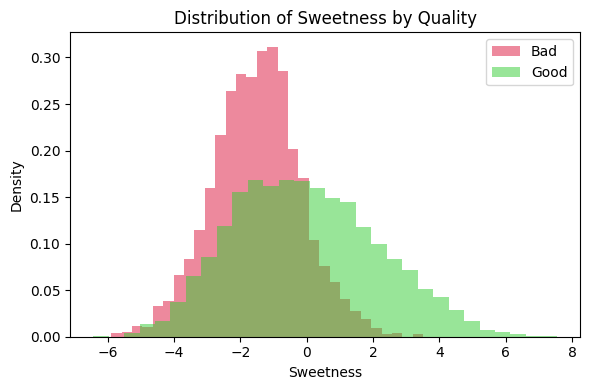

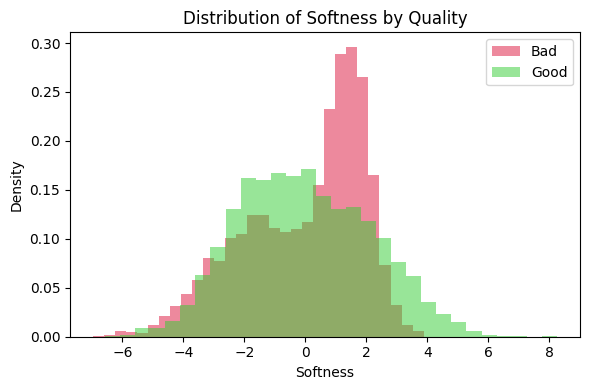

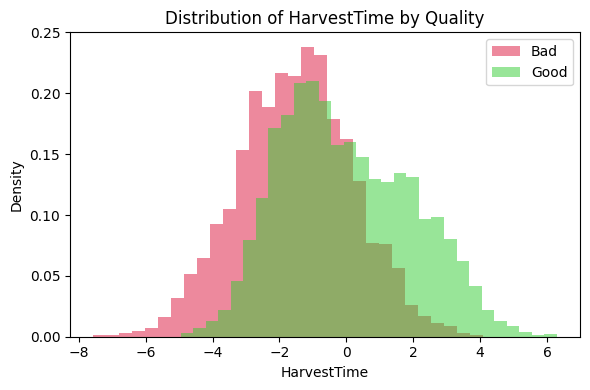

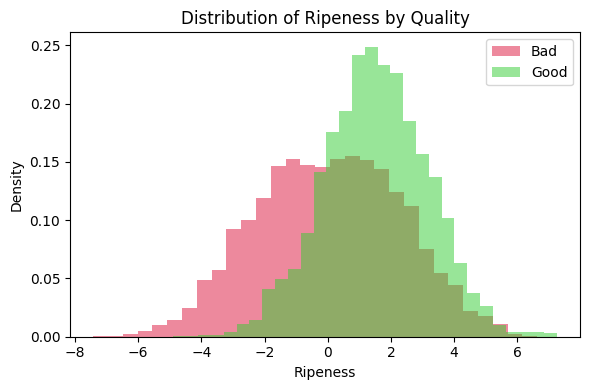

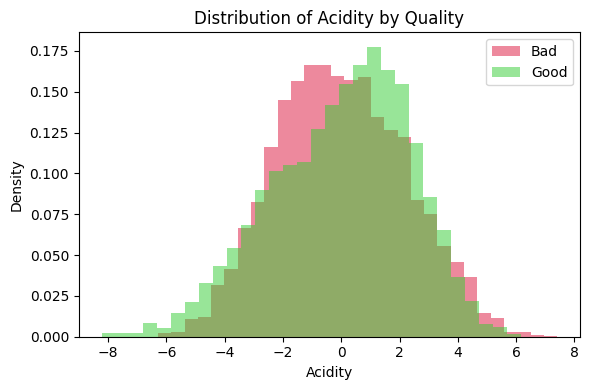

In [ ]:
#Overlaping Features
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X[y == 0][feature], bins=30, alpha=0.5, label='Bad', color='crimson', density=True)
    plt.hist(X[y == 1][feature], bins=30, alpha=0.5, label='Good', color='limegreen', density=True)
    plt.title(f'Distribution of {feature} by Quality')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

###Training Models and Hyperparameter Tuning

In [ ]:
# Random Forest Hyperparameter Grid
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params,
                       cv=3,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)

rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)

print("Random Forest Best Params:", rf_grid.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
# SVM Hyperparameter Grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(),
                        svm_params,
                        cv=3,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=1)

svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
svm_pred = svm_best.predict(X_test)

print("SVM Best Params:", svm_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# KNN Hyperparameter Grid
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_params,
                        cv=3,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=1)

knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)

print("KNN Best Params:", knn_grid.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN Best Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


###Comparison

In [ ]:
models = {'Random Forest': rf_pred, 'SVM': svm_pred, 'KNN': knn_pred}

for name, preds in models.items():
    print(f'\n{name}')
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))



Random Forest
Confusion Matrix:
 [[760  21]
 [ 20 799]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       781
           1       0.97      0.98      0.97       819

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


SVM
Confusion Matrix:
 [[766  15]
 [ 10 809]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       781
           1       0.98      0.99      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


KNN
Confusion Matrix:
 [[763  18]
 [ 14 805]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       781
           

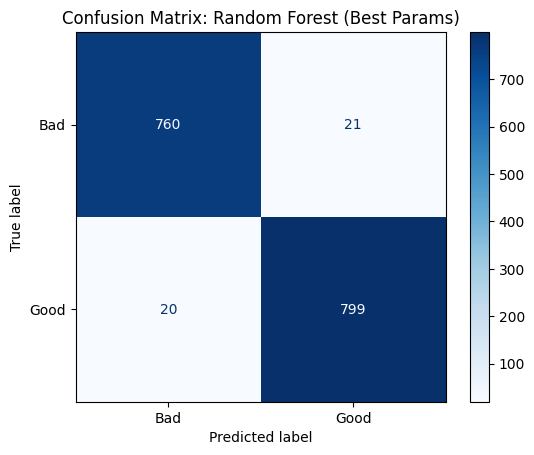

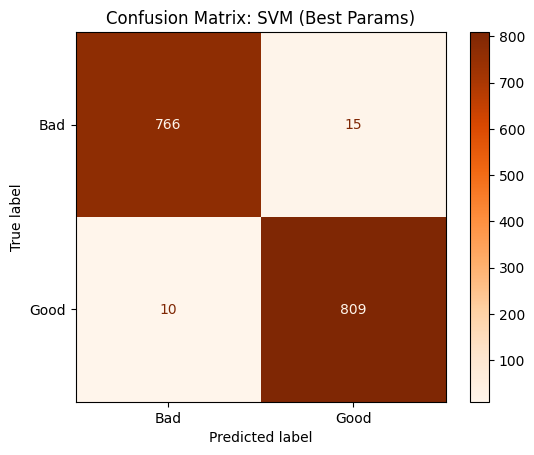

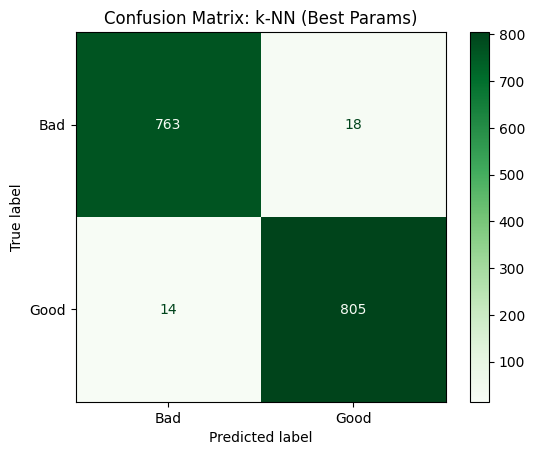

In [ ]:
#Random Forest Confusion Matrix
rf_pred = rf_best.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Bad", "Good"])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix: Random Forest (Best Params)')
plt.show()

#SVM Confusion Matrix
svm_pred = svm_best.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Bad", "Good"])
disp_svm.plot(cmap='Oranges')
plt.title('Confusion Matrix: SVM (Best Params)')
plt.show()

# KNN Confusion Matrix
knn_pred = knn_best.predict(X_test)
cm_knn = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Bad", "Good"])
disp_knn.plot(cmap='Greens')
plt.title('Confusion Matrix: k-NN (Best Params)')
plt.show()